## Getting Data 

In [1]:
import quandl
data2 = quandl.get("EOD/HD", authtoken="dusYQoyrxzBKnR4esBk9")

In [30]:
data2.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,74.83,75.25,73.68,73.90,7802800.0,0.39,1.0,65.913791,66.283747,64.900817,65.094603,7802800.0
2013-09-04,73.98,74.51,73.74,74.14,8271600.0,0.00,1.0,65.165071,65.631920,64.953668,65.306007,8271600.0
2013-09-05,74.07,74.21,72.84,72.99,11039000.0,0.00,1.0,65.244347,65.367666,64.160905,64.293032,11039000.0
2013-09-06,73.55,73.56,72.21,72.70,9968400.0,0.00,1.0,64.786307,64.795115,63.605972,64.037587,9968400.0
2013-09-09,72.98,73.79,72.90,73.58,5781800.0,0.00,1.0,64.284224,64.997710,64.213756,64.812732,5781800.0


In [31]:
data2.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.0,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,118.182440,119.028397,117.356472,118.226147,5.415875e+06,0.010404,1.0,109.371583,110.152952,108.609058,109.412348,5.415875e+06
std,28.181856,28.315220,28.065248,28.208633,2.274563e+06,0.083182,0.0,28.761464,28.900528,28.638959,28.787569,2.274563e+06
min,72.980000,73.560000,72.210000,72.700000,1.517075e+06,0.000000,1.0,64.284224,64.795115,63.605972,64.037587,1.517075e+06
25%,92.310000,93.000000,91.362575,92.127500,3.895442e+06,0.000000,1.0,83.056038,83.712514,82.238611,82.856554,3.895442e+06
50%,120.910000,121.885000,119.690000,120.690000,4.927485e+06,0.000000,1.0,111.522670,112.329684,110.278486,111.601966,4.927485e+06
75%,135.725000,136.495000,134.810000,135.737500,6.349263e+06,0.000000,1.0,127.115128,127.908726,126.454243,127.241542,6.349263e+06
max,190.910000,191.490000,190.010000,190.360000,2.075320e+07,0.890000,1.0,184.068443,184.627658,183.200696,183.538153,2.075320e+07


## Imports 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVR
import time

## Windowing with size = 30

In [3]:
df = pd.DataFrame(data2['Adj_Close'])

In [4]:
df['Predictions'] = df['Adj_Close'].shift(-10)

In [5]:
x = df['Adj_Close']

In [6]:
x = x[:-10]

In [7]:
y = np.array(df['Predictions'])

In [8]:
y = y[:-10]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

## Training Different Model 

In [11]:
svr_linear = SVR(kernel = 'linear', C = 1e3)
svr_poly = SVR(kernel = 'poly', degree = 2, C = 1e3)
svr_rbf = SVR(kernel = 'rbf', gamma = 0.1, C = 1e3)

In [10]:
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

## Optimization using GridSearchCV 

In [52]:
parameters = {'kernel': ('linear', 'rbf'), 'C':[10,100,1000,10000]}

In [53]:
svr = SVR()

In [54]:
clf = GridSearchCV(svr, param_grid=parameters, n_jobs=-1, cv = 5)

In [55]:
clf.fit(x_train, y_train)

/home/shreyashrawat/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [10, 100, 1000, 10000], 'kernel': ('linear', 'rbf')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
clf.best_params_

{'C': 100, 'kernel': 'linear'}

## Optimal Model 

In [57]:
svr_optimal = SVR(kernel = 'linear', C = 100)

In [58]:
start = time.time()
svr_optimal.fit(x_train, y_train)

/home/shreyashrawat/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
predictions = svr_optimal.predict(x_test)

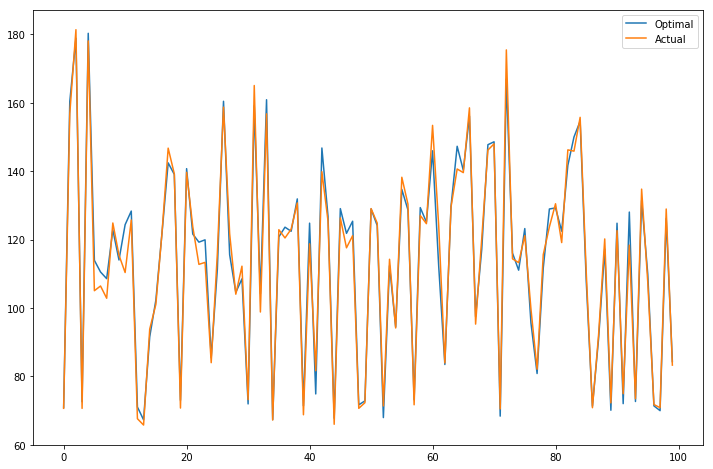

In [63]:
fig = plt.figure(figsize = (12,8))
plt.plot(predictions[:100], label = 'Optimal')
plt.plot(y_test[:100], label = 'Actual')
plt.legend()

In [64]:
mean_absolute_error(y_test, predictions)

2.7143536454419777

In [65]:
mean_squared_error(y_test, predictions)

12.960917797714645

## Fitting Model

In [12]:
svr_linear.fit(x_train, y_train)

/home/shreyashrawat/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
svr_poly.fit(x_train, y_train)

/home/shreyashrawat/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shreyashrawat/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
svr_rbf.fit(x_train, y_train)

/home/shreyashrawat/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [17]:
pred2 = svr_rbf.predict(x_test)

In [16]:
pred = svr_linear.predict(x_test)

In [29]:
pred3 = svr_poly.predict(x_test)

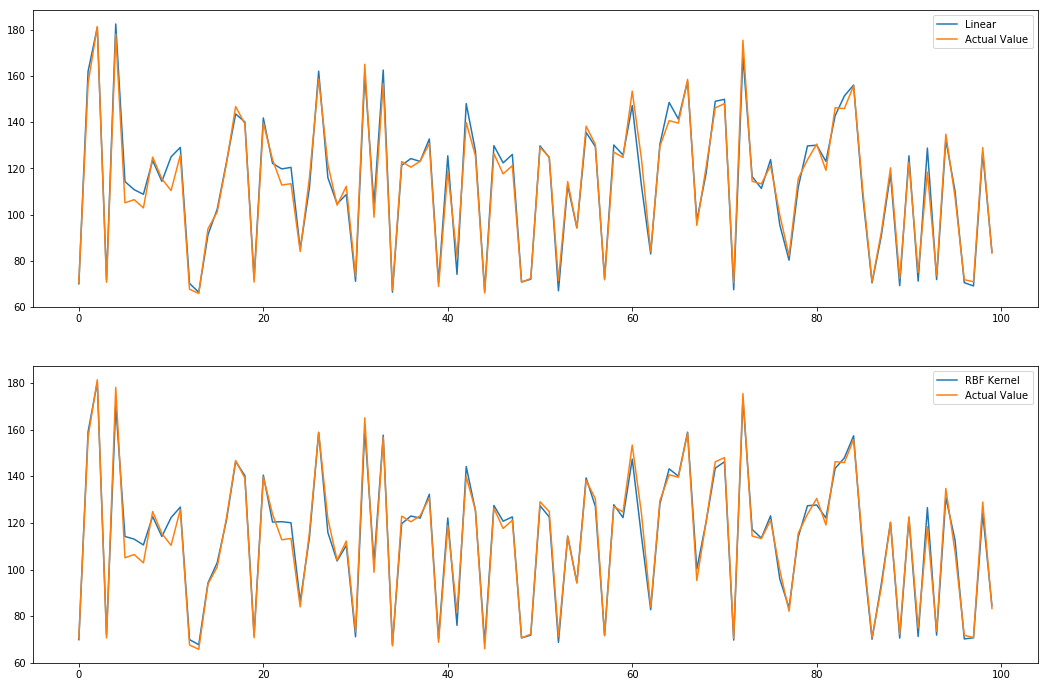

In [37]:
fig,ax = plt.subplots(2,1,figsize = (18,12))
ax[0].plot(pred[:100], label = 'Linear')
ax[0].plot(y_test[:100], label = 'Actual Value')
ax[0].legend()

ax[1].plot(pred2[:100], label = 'RBF Kernel')
ax[1].plot(y_test[:100], label = 'Actual Value')


ax[1].legend()

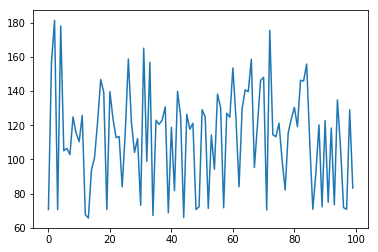

In [44]:

plt.plot(y_test[:100], label = 'Actual Value')


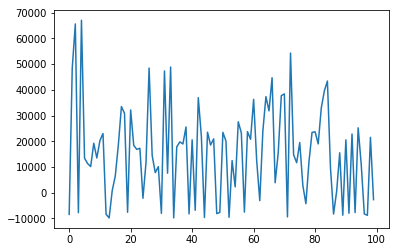

In [47]:
axes = plt.gca()
plt.plot(pred3[:100])


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
mean_squared_error(y_test, pred)

14.112998146933169

In [23]:
mean_squared_error(y_test, pred2)

11.616263414950291

In [26]:
mean_absolute_error(y_test, pred)

2.8732427509872775

In [27]:
mean_absolute_error(y_test, pred2)

2.4403822307576797